## ASSIGNMENT 1

### Question 1 (20 points)
       We will be working on two datasets as part of this question.
    1. Robot1 & Robot2 The robot problem is from artiﬁcial robot domain in which robots are described by 6 diﬀerent attributes. The learning task is a binary classiﬁcation task. Perform modelling on both the datasets. Data is available at http://preon.iiit.ac.in/~sanjoy_chowdhury/RobotDataset.zip

    2. Iris.csv The data set consists of samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Data and it’s description is available at http://preon.iiit.ac.in/~sanjoy_chowdhury/ Iris.zip
                    Use the above datasets to answer following questions
1. Implement a KNN classiﬁer for each of the datasets. Report precision, recall, f1 score and accuracy. Compare your result with in-built(scikit-learn) KNN function to check correctness of your algorithm.(10 points)
2. Use diﬀerent distance measures as applicable. Plot graph to report accuracy with change in value of K. Also suggest possible reason for better performance. (10 points)
### Question 2 (20 points)
     A bank is implementing a system to identify potential customers who have higher probablity of availing loans to increase its proﬁt. Implement Naive Bayes classiﬁer on this dataset to help bank achieve its goal. Report your observations and accuracy of the model. Data is available at http://preon.iiit.ac.in/~sanjoy_chowdhury/ LoanDataset.zip
### Question 3 (20 points)
    We are given a dataset containing various criteria important to get admissions into Master’s program and probablity of getting an admit. Dataset is available at http://preon.iiit.ac.in/~sanjoy_chowdhury/AdmissionDataset.zip
    
    3.1. Implement a model using linear regression to predict the probablity of getting the admit.(10 points)
    
    3.2. Compare the performance of Mean square error loss function vs Mean Absolute error function vs Mean absolute percentage error function and explain the reasons for the observed behaviour.(5 points)
    
    3.3. Analyse and report the behaviour of the coeﬃcients(for example: sign of coeﬃcients, value of coeﬃcients etc.) and support it with appropriate plots as necessary(5 points)


In [3]:
import pandas as pd
import numpy as np

#### Loading the IRIS dataset

In [4]:
df_iris = pd.read_csv("Iris/iris.csv",header=None)
df_iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,6.3,3.3,6.0,2.5,Iris-virginica
2,5.0,3.0,1.6,0.2,Iris-setosa
3,6.2,2.8,4.8,1.8,Iris-virginica
4,6.4,3.1,5.5,1.8,Iris-virginica


In [5]:
df_iris.columns=["attr1","attr2","attr3","attr4","label"]

In [6]:
df_iris.head()

,attr1,attr2,attr3,attr4,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,6.3,3.3,6.0,2.5,Iris-virginica
2,5.0,3.0,1.6,0.2,Iris-setosa
3,6.2,2.8,4.8,1.8,Iris-virginica
4,6.4,3.1,5.5,1.8,Iris-virginica


In [7]:
label = df_iris["label"]
df_iris= df_iris.iloc[:,0:4]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df_iris,label,test_size = 0.2)

In [9]:
print("X_train shape:",X_train.shape)
print("Y_train shape:",Y_train.shape)
print("X_test shape:",X_test.shape)
print("Y_test shape:",Y_test.shape)

X_train shape: (108, 4)
Y_train shape: (108,)
X_test shape: (27, 4)
Y_test shape: (27,)


### Implementing KNN alogorithm

In [10]:

def find_majority(distances,k):
    labels = []
    for i in range(0,k):
        labels.append(distances[i][1])
    return max(labels,key=labels.count)
def knn(X_train,Y_train,X_test,k=3,p=2):
    predictions=[]
    for test_index,test_rows in X_test.iterrows():
        distances=[]
        for train_index,train_rows in X_train.iterrows():
            dist_each = 0
            for key in X_train.keys():
                dist_each += abs(test_rows[key] - train_rows[key])**p
            dist_each=dist_each**(1/p)
            distances.append((dist_each,Y_train[train_index]))
        distances.sort()  
        predictions.append(find_majority(distances,k))
    return predictions
    

#### Question 1.1

In [11]:
predictions = knn(X_train,Y_train,X_test,k=5,p=2)

In [12]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print(metrics.classification_report(Y_test,predictions))
print("accuracy_score:",accuracy_score(Y_test,predictions))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.86      1.00      0.92         6
 Iris-virginica       1.00      0.89      0.94         9

    avg / total       0.97      0.96      0.96        27

accuracy_score: 0.9629629629629629


#### TRAINING WITH SKLEARN KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
pred = neigh.predict(X_test)

In [14]:
print(metrics.classification_report(Y_test,pred))
print("accuracy_score:",accuracy_score(Y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         6
 Iris-virginica       1.00      1.00      1.00         9

    avg / total       1.00      1.00      1.00        27

accuracy_score: 1.0


#### question 1.2

In [15]:
accuracy=[]
k_neigh = []
for k in range(1,80,2):
    pred = knn(X_train,Y_train,X_test,k=k,p=2)
    accuracy.append(accuracy_score(Y_test,pred))
    k_neigh.append(k)



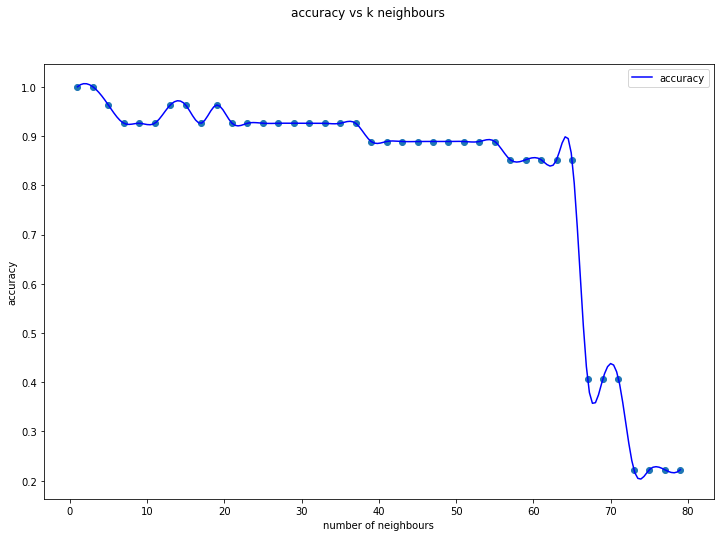

In [17]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(12,8))
fig.suptitle("accuracy vs k neighbours")
plt.xlabel("number of neighbours")
plt.ylabel("accuracy")
neigh_new = np.linspace(min(k_neigh), max(k_neigh),200)
f1 = interp1d(k_neigh, accuracy, kind='cubic')
accuracy_smooth = f1(neigh_new)
plt.plot(neigh_new, accuracy_smooth,linestyle='-', color='b',label="accuracy")
plt.scatter(k_neigh,accuracy)
# plt.plot(k_neigh,accuracy,linestyle='-',color='r',label="accuracy")
# plt.scatter(k_neigh,accuracy)
plt.legend()
plt.show()

In [19]:
df_robot1 = pd.read_csv("RobotDataset/Robot1",header=None,delimiter=' ')
df_robot1.head(5)

,0,1,2,3,4,5,6,7,8
0,NaN,1,1,1,1,1,3,1,data_5
1,NaN,1,1,1,1,1,3,2,data_6
2,NaN,1,1,1,1,3,2,1,data_19
3,NaN,1,1,1,1,3,3,2,data_22
4,NaN,1,1,1,2,1,2,1,data_27


In [20]:
df_robot1=df_robot1.iloc[:,1:8]
df_robot1.head()

,1,2,3,4,5,6,7
0,1,1,1,1,1,3,1
1,1,1,1,1,1,3,2
2,1,1,1,1,3,2,1
3,1,1,1,1,3,3,2
4,1,1,1,2,1,2,1


In [21]:
label = df_robot1[1]
df_robot1=df_robot1.iloc[:,1:8]
df_robot1.head()

,2,3,4,5,6,7
0,1,1,1,1,3,1
1,1,1,1,1,3,2
2,1,1,1,3,2,1
3,1,1,1,3,3,2
4,1,1,2,1,2,1


In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(df_robot1,label,test_size=0.3)

##### APPLYING KNN

In [23]:
PRED = knn(X_train,Y_train,X_test,k=11,p=2)
print(metrics.classification_report(Y_test,PRED))
print("Accuracy_score: ",accuracy_score(Y_test,PRED))

             precision    recall  f1-score   support

          0       0.75      0.95      0.84        19
          1       0.93      0.68      0.79        19

avg / total       0.84      0.82      0.81        38

Accuracy_score:  0.8157894736842105


In [24]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
pred = neigh.predict(X_test)
print(metrics.classification_report(Y_test,pred))
print("Accuracy_score: ",accuracy_score(Y_test,pred))

             precision    recall  f1-score   support

          0       0.81      0.68      0.74        19
          1       0.73      0.84      0.78        19

avg / total       0.77      0.76      0.76        38

Accuracy_score:  0.7631578947368421


Here my implementation performs almost same or better than the inbuilt sklearn

In [25]:
accuracy=[]
k_neigh = []
for k in range(1,80,2):
    pred = knn(X_train,Y_train,X_test,k=k,p=2)
    accuracy.append(accuracy_score(Y_test,pred))
    k_neigh.append(k)


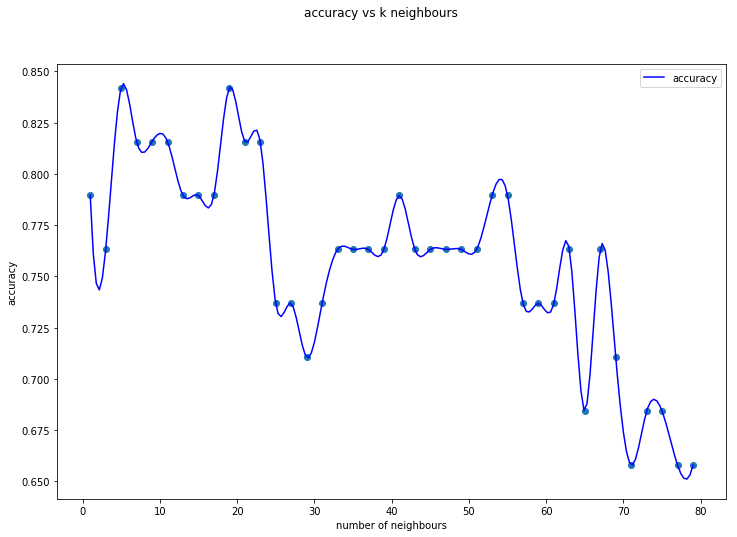

In [26]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt


fig=plt.figure(figsize=(12,8))
fig.suptitle("accuracy vs k neighbours")
plt.xlabel("number of neighbours")
plt.ylabel("accuracy")
neigh_new = np.linspace(min(k_neigh), max(k_neigh),200)
f1 = interp1d(k_neigh, accuracy, kind='cubic')
accuracy_smooth = f1(neigh_new)
plt.plot(neigh_new, accuracy_smooth,linestyle='-', color='b',label="accuracy")
plt.scatter(k_neigh,accuracy)
# plt.plot(k_neigh,accuracy,linestyle='-',color='r',label="accuracy")
# plt.scatter(k_neigh,accuracy)
plt.legend()
plt.show()

##### as number of k increases after a certain limit it underfits... and if k is too small it will overfit

### Question 2

In [27]:
#load the dataset
import pandas as pd
df_loan = pd.read_csv("LoanDataset/data.csv",header=None)
df_loan.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,25,1.1,49,91107,4,1.6,1,0,0,1.3,0.2,0.3,0.4
1,2701,31,5.0,39,94590,4,2.2,2,0,0,0.0,0.0,1.0,1.0
2,2716,42,18.0,54,90089,1,1.8,1,0,0,0.0,0.0,1.0,0.0
3,3359,59,35.0,40,94536,4,0.4,1,0,0,0.0,0.0,0.0,0.0
4,2492,38,14.0,80,92868,2,2.7,1,0,0,0.0,0.0,1.0,0.0


In [28]:
df_loan[9].value_counts()

0    4066
1     434
Name: 9, dtype: int64

In [29]:
#removing the first row of the dataset as it contains wrong information
df_loan = df_loan.drop(df_loan.index[0])

In [30]:
Y_label = df_loan[9]
del df_loan[9]
del df_loan[0]           #id is unique and it is not useful for any prediction

In [31]:
df_loan.head()

,1,2,3,4,5,6,7,8,10,11,12,13
1,31,5.0,39,94590,4,2.2,2,0,0.0,0.0,1.0,1.0
2,42,18.0,54,90089,1,1.8,1,0,0.0,0.0,1.0,0.0
3,59,35.0,40,94536,4,0.4,1,0,0.0,0.0,0.0,0.0
4,38,14.0,80,92868,2,2.7,1,0,0.0,0.0,1.0,0.0
5,62,32.0,19,92109,1,1.5,3,0,1.0,0.0,0.0,0.0


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df_loan,Y_label,test_size=0.2)


In [33]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3599, 12)
(900, 12)
(3599,)
(900,)


In [34]:
X_train.head()

,1,2,3,4,5,6,7,8,10,11,12,13
1524,51,26.0,98,90024,1,1.3,3,0,0.0,0.0,1.0,1.0
4423,56,32.0,103,94111,3,4.0,3,0,0.0,0.0,0.0,0.0
3488,28,4.0,94,92115,3,0.8,1,236,0.0,0.0,1.0,0.0
213,26,0.0,42,92009,4,1.3,3,153,0.0,0.0,1.0,0.0
2145,31,6.0,44,95616,4,0.8,1,122,0.0,0.0,1.0,0.0


In [35]:
#1 for numerical and 0 to recognise categorical
attr_detail = [1,1,1,1,1,1,1,1,0,0,0,0]

In [36]:
df = X_train[X_train[11]==1]
df.head()

,1,2,3,4,5,6,7,8,10,11,12,13
1714,27,2.0,158,95060,3,0.4,2,0,0.0,1.0,1.0,0.0
3214,29,4.0,120,94553,1,4.1,2,0,1.0,1.0,0.0,1.0
878,52,26.0,109,94710,1,2.4,1,308,0.0,1.0,1.0,1.0
4389,58,32.0,85,92110,2,2.0,1,161,1.0,1.0,1.0,1.0
2899,56,32.0,125,91330,3,0.6,1,342,0.0,1.0,1.0,1.0


In [37]:
d={'x':1,'y':2,'z':3}
len(d.keys())

3

In [38]:
from statistics import mean
from statistics import stdev
from scipy.stats import norm
def predict(train_result,prob_classes,test_point):
    class_prob={}
    for key,value in train_result.items():
        class_prob[key]=1
        for i in range(len(test_point)):
            if type(value[i]) == dict:
                if test_point[i] in value[i].keys():
                    prob = value[i][test_point[i]]
                else:
                    prob=1/(len(value[i].keys()))
            else:
                mean,std = value[i]
                prob = norm(mean,std).pdf(test_point[i])
            class_prob[key] *= prob
    for key ,value in class_prob.items():
        class_prob[key] *= prob_classes[key]
    max_prob=0
    for key, value in class_prob.items():
        if max_prob < value:
            max_prob=value
            predicted_class=key
            
    return predicted_class
            
        
                
    
    
    
def NBclassifier(X_train,Y_train,X_test,attribute_detail=[]):
    if len(attribute_detail)==0:
        attribute_detail=[1 for i in range(X_train.shape[1])]
    X_train = X_train.assign(label = Y_train)
    target_variables = X_train["label"].unique()
    prob_classes={}
    train_result={}
    for target_variable in target_variables:
        subtable = X_train[X_train["label"]==target_variable]
        prob_ck = subtable.shape[1]/X_train.shape[1]
        prob_classes[target_variable]=prob_ck
        train_result[target_variable]={}
        for i in range(len(attribute_detail)):
            if attribute_detail[i]==1:
                mean_value = mean(subtable[subtable.columns[i]])
                stdev_value = stdev(subtable[subtable.columns[i]])
                train_result[target_variable][i]=(mean_value,stdev_value)
            if attribute_detail[i]==0:
                if i not in train_result[target_variable].keys():
                    train_result[target_variable][i]={}
                categories = subtable[subtable.columns[i]].unique()
                for category in categories:
                    num = len(subtable[subtable[subtable.columns[i]]==category])
                    den = subtable.shape[0]
                    prob_likelyhood = (num)/(den)
                    train_result[target_variable][i][category] = prob_likelyhood
#     return train_result
    predictions=[]
    X_test_list = X_test.values.tolist()
    for row in X_test_list:
        predictions.append(predict(train_result,prob_classes,row))
    return predictions         
            

In [39]:
pred = NBclassifier(X_train,Y_train,X_test)

In [40]:
from sklearn import metrics
print(metrics.classification_report(Y_test,pred))

             precision    recall  f1-score   support

          0       0.97      0.88      0.93       811
          1       0.42      0.76      0.54        89

avg / total       0.92      0.87      0.89       900



In [41]:
from sklearn.metrics import accuracy_score
print("accuracy_score:",accuracy_score(Y_test,pred))

accuracy_score: 0.8722222222222222


In [42]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,Y_train)
pred = clf.predict(X_test)

In [43]:
print("accuracy_score:",accuracy_score(Y_test,pred))

accuracy_score: 0.8955555555555555


### Question-3

In [44]:
import pandas as pd
df_admission = pd.read_csv("AdmissionDataset/Data.csv")
df_admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,242,317,103,2,2.5,2.0,8.15,0,0.65
1,334,319,108,3,3.0,3.5,8.54,1,0.71
2,4,322,110,3,3.5,2.5,8.67,1,0.80
3,45,326,113,5,4.5,4.0,9.40,1,0.91
4,232,319,106,3,3.5,2.5,8.33,1,0.74


The dataset looks like clean and the Target variable is "Chance of Admit".

In [45]:
target = df_admission["Chance of Admit "]
del df_admission["Chance of Admit "]
# del df_admission["Serial No."]

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df_admission,target,test_size=0.2)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_train shape: ",Y_train.shape)
print("Y_test shape: ",Y_test.shape)

X_train shape:  (360, 8)
X_test shape:  (90, 8)
Y_train shape:  (360,)
Y_test shape:  (90,)


### Building Linear Regression from Scratch

In [47]:
import numpy as np
def standardization(dataframe):
    mean=dataframe.mean()
    std = dataframe.std()
    dataframe = (dataframe-dataframe.mean())/dataframe.std()
    return dataframe,mean,std
def LinearRegression(X_train,Y_train,learn_rate=0.1):
    X_train,mean,std = standardization(X_train)

    W = np.random.rand(X_train.shape[1]+1,)
    X_train.insert(0,1,1)
    Y_pred=[]
    Y_pred = X_train.dot(W.T)
    loss = 0.5 * (1/X_train.shape[0])*np.sum((Y_train-Y_pred)**2)
    new_loss =float('inf')
    while(new_loss != loss):
        loss = new_loss
        W = W - (learn_rate/X_train.shape[0])*np.dot(X_train.T, Y_pred - Y_train)
        Y_pred = X_train.dot(W.T)
        new_loss = 0.5 *(1/X_train.shape[0])* np.sum((Y_train-Y_pred)**2)
    return W,mean,std
def predict(X_test,W_vec,mean,std):
    X_test=(X_test-mean)/std
    X_test.insert(0,1,1)
    Y_pred=[]
    Y_pred = np.round(X_test.dot(W_vec.T),2)
    return Y_pred

In [48]:
W_vec,mean,std = LinearRegression(X_train,Y_train)
Y_pred = predict(X_test,W_vec,mean,std)


In [49]:
from sklearn.metrics import r2_score
print("accuracy_score",r2_score(Y_pred,Y_test))

accuracy_score 0.8197651821550752


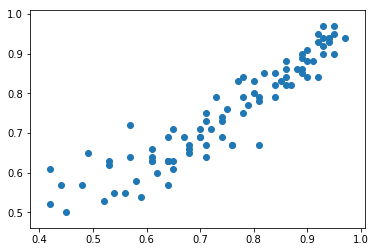

In [50]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred)



plt.show()

#### Question 3.2

In [52]:
mse = (0.5/X_test.shape[0])*np.sum((Y_pred-Y_test)**2)
print("mean squared error: ",mse)

mean squared error:  0.0014455555555555556


In [55]:
mae = (1/X_test.shape[0])*np.sum(abs(Y_pred-Y_test))
print("mean absolute error:",mae)

mean absolute error: 0.038


In [56]:
mpe = (1/X_test.shape[0])*np.sum((Y_pred-Y_test)/Y_test)
print("mpe :",mpe)

mpe : 0.015948206713120548


### Question 3.3

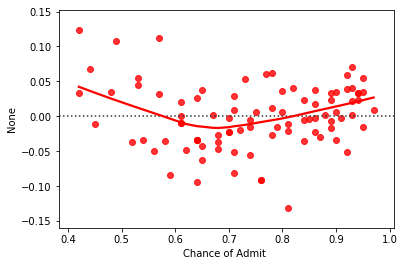

In [60]:
import seaborn as sns
sns.residplot(Y_test,Y_pred-Y_test,lowess=True, color='r')

From the plot we can observe that if the probability of admit is high then the error in prediction is less.
But when the probability of admit is less, the errors are somewhat more

                                                                                            -Souparna Das
                                                                                            IIIT HYDERABAD